In [6]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [7]:
!apt-get install libsm6 libxext6 libxrender-dev libcap-dev ffmpeg
!pip install --upgrade git+https://github.com/surfriderfoundationeurope/mot.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcap-dev is already the newest version (1:2.25-1.2).
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Cloning https://github.com/surfriderfoundationeurope/mot.git to /tmp/pip-req-build-bpqz5jda
  Running command git clone -q https://github.com/surfriderfoundationeurope/mot.git /tmp/pip-req-build-bpqz5jda
  Created wheel for mot: filename=mot-0.1-cp36-none-any.whl size=67375 sha256=a74fb5a336db1d469e116513ed6ffea49e3293b030e92b0ada0e861af056b340
  Stored in directory: /tmp/pip-ephem-wheel-cache-vbh6du1e/wheels/76/5e/c9/557796bac605b218595cec16a4ba5d8fb5117e77227beecf78
Successfully built mot
  Found existing installation: mot 0.1
    Uninstalling mot-0

# Download Dataset

In [0]:
import wget
from zipfile import ZipFile

wget.download("http://files.heuritech.com/raw_files/dataset_surfrider_cleaned.zip", ".")

with ZipFile('dataset_surfrider_cleaned.zip', 'r') as zipObj:
     zipObj.extractall()

# Download model

In [9]:
!mkdir plastic_trained_resnet50_fpn

mkdir: cannot create directory ‘plastic_trained_resnet50_fpn’: File exists


In [10]:
wget.download("https://files.heuritech.com/raw_files/surfrider/resnet50_fpn/model-6000.index", "plastic_trained_resnet50_fpn")
wget.download("https://files.heuritech.com/raw_files/surfrider/resnet50_fpn/model-6000.data-00000-of-00001", "plastic_trained_resnet50_fpn")

'plastic_trained_resnet50_fpn/model-6000 (1).data-00000-of-00001'

In [12]:
!python3 -m mot.object_detection.predict --load plastic_trained_resnet50_fpn/model-6000 --evaluate evaluation.json --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False


2020-04-09 14:51:15.681128: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-09 14:51:15.739138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-09 14:51:15.739696: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-04-09 14:51:15.739989: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-04-09 14:51:15.741777: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-04-09 14:51:15.749675: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020

In [13]:
!ls

 dataset_surfrider_cleaned	      evaluation.json-mot_val
'dataset_surfrider_cleaned (1).zip'   plastic_trained_resnet50_fpn
 dataset_surfrider_cleaned.zip	      sample_data


In [0]:
import json
with open('evaluation.json-mot_val') as json_file:
    data = json.load(json_file)

In [17]:
data

[{'bbox': [205.2639, 364.6539, 243.7071, 393.039],
  'category_id': 'bottles',
  'image_id': '0b834e525826296745de38c7289a8692',
  'score': 0.9952},
 {'bbox': [328.7965, 333.3286, 357.078, 348.4962],
  'category_id': 'bottles',
  'image_id': '0b834e525826296745de38c7289a8692',
  'score': 0.182},
 {'bbox': [401.6852, 368.7221, 423.5237, 396.4345],
  'category_id': 'others',
  'image_id': '0b834e525826296745de38c7289a8692',
  'score': 0.0819},
 {'bbox': [402.2735, 368.4564, 420.7077, 392.265],
  'category_id': 'fragments',
  'image_id': '0b834e525826296745de38c7289a8692',
  'score': 0.0733},
 {'bbox': [328.5487, 332.8952, 357.083, 348.3713],
  'category_id': 'others',
  'image_id': '0b834e525826296745de38c7289a8692',
  'score': 0.182},
 {'bbox': [80.3596, 163.9129, 280.325, 561.5186],
  'category_id': 'fragments',
  'image_id': 'eed8cada246eb0f9ccc292db4809fa34',
  'score': 0.9964},
 {'bbox': [274.1741, 197.9662, 393.5028, 330.4106],
  'category_id': 'fragments',
  'image_id': 'eed8cada2

In [0]:
list_id = []
for image in data:
  list_id.append(image['image_id'])

In [0]:
import os
for img_id in list_id[:2]:
  myCmd = f'python3 -m mot.object_detection.predict --load plastic_trained_resnet50_fpn/model-6000 --predict dataset_surfrider_cleaned/Images_md5/{img_id} --config DATA.BASEDIR=dataset_surfrider_cleaned MODE_MASK=False'
  os.system(myCmd)
  

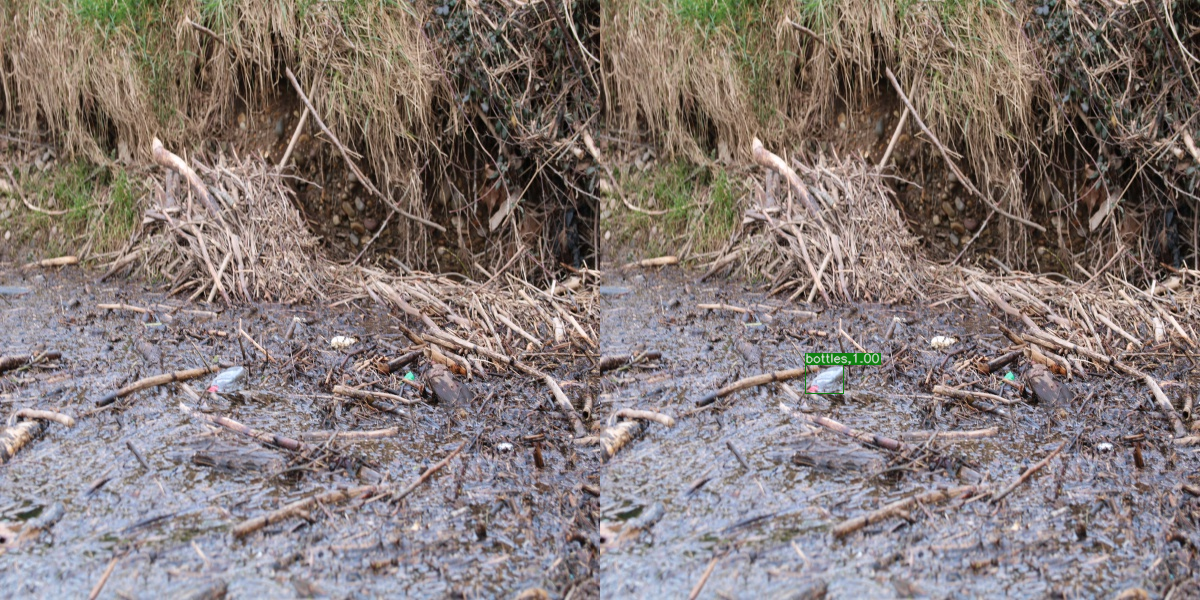

In [26]:
from IPython.display import Image
Image('output.png')

In [22]:
!ls

 dataset_surfrider_cleaned	      output.png
'dataset_surfrider_cleaned (1).zip'   plastic_trained_resnet50_fpn
 dataset_surfrider_cleaned.zip	      sample_data
 evaluation.json-mot_val
